# Roots of Non-Linear Equation

## Imports

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.optimize as opt

## The "3-Way" Bisection (Vanilla, Trisection and Random) (Manual)

`Intution Behind Trisection and Random Method: `

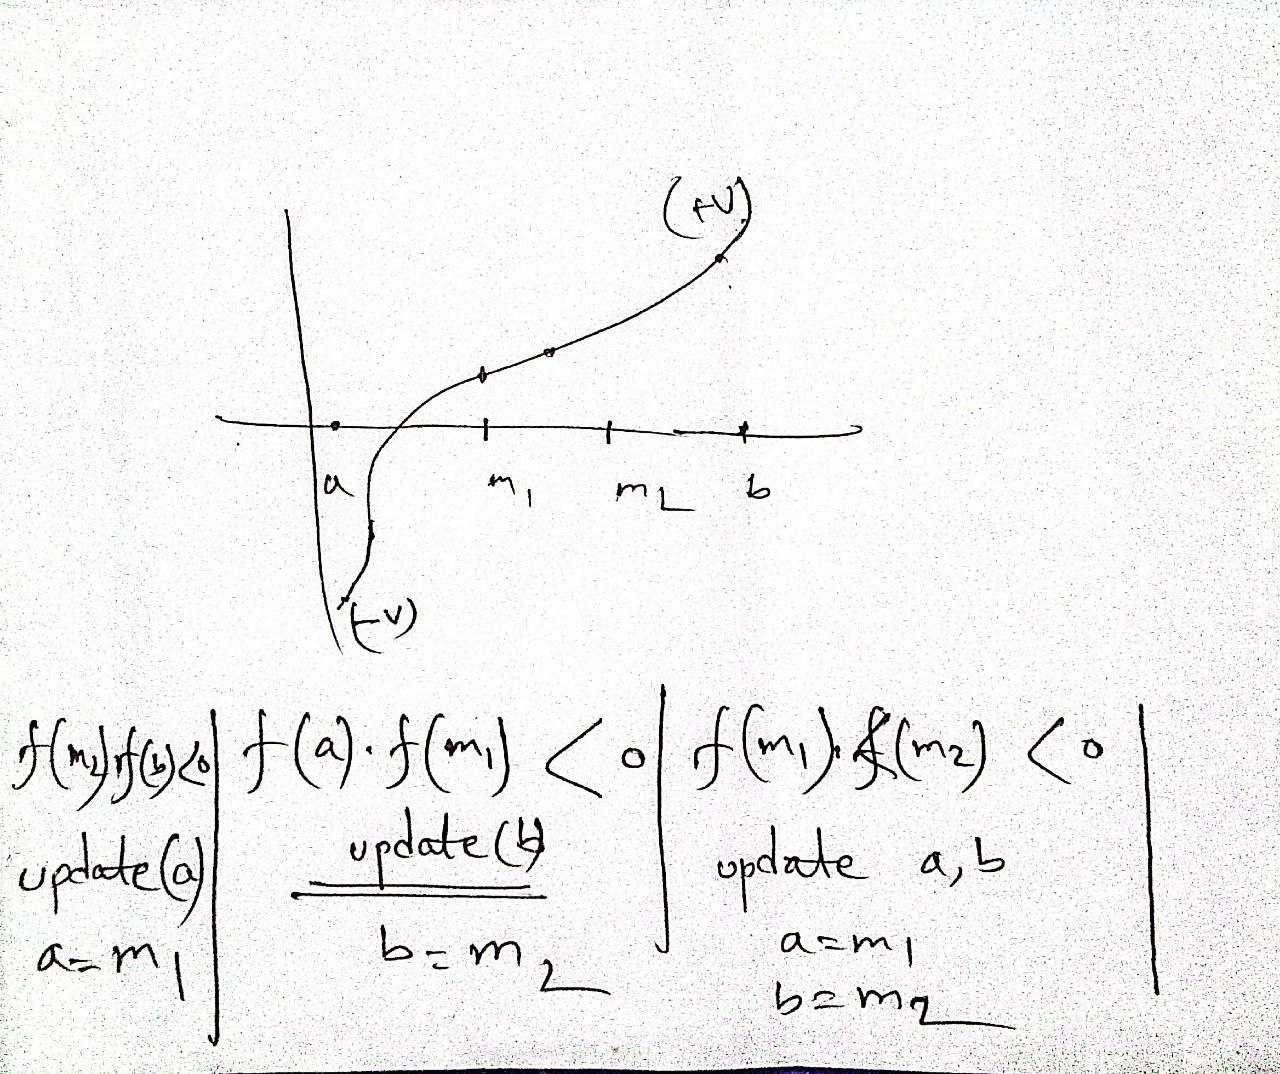

In [141]:
def solve_bisection(function, a, b, tol=1e-6, method="vanilla"):
    if function(a) * function(b) >= 0:
        return None, 0
    steps = 0

    while abs(b - a) > tol:
        steps += 1

        if method == "vanilla":
            m = (a + b) / 2
            if function(a) * function(m) < 0:
                b = m
            else:
                a = m

        elif method in ["trisection", "random"]:
            if method == "trisection":
                delta = (b - a) / 3
                m1 = a + delta
                m2 = a + 2 * delta
            else:
                m1, m2 = sorted(np.random.uniform(a, b, 2))

            if function(a) * function(m1) < 0:
                b = m1
            elif function(m1) * function(m2) < 0:
                a = m1
                b = m2
            else:
                a = m2

    root = (a + b) / 2
    return root, steps

Function :  $xsin(x)^2 - e^x + 5 = 0$

In [142]:
def eq(x):
    return x * (np.sin(x) ** 2) - np.exp(x) + 5

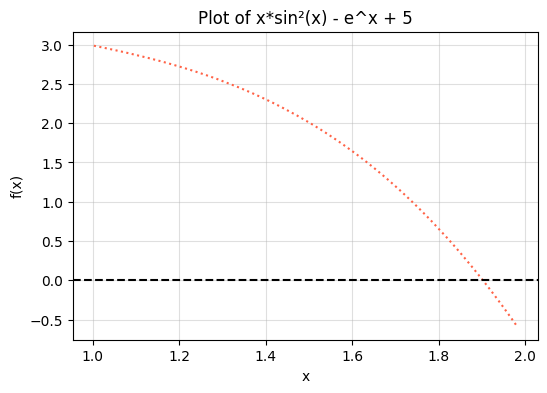

In [143]:
x_vals = sorted(np.random.uniform(1, 2, 100))
y_vals = eq(x_vals)

plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, color="tomato", ls=":")
plt.axhline(y=0, color="k", linestyle="--")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of x*sin²(x) - e^x + 5")
plt.grid(alpha=0.4)
plt.show()

`From the figure we can take [1, 2] as the bracket.`

In [144]:
root_vanilla, steps_vanilla = solve_bisection(eq, 1, 2)
print(f"Root is: {root_vanilla:.5f}")
print(f"Steps Required: {steps_vanilla}")

Root is: 1.90223
Steps Required: 20


In [145]:
root_trisection, steps_trisection = solve_bisection(eq, 1, 2, method="trisection")
print(f"Root is: {root_trisection:.5f}")
print(f"Steps Required: {steps_trisection}")

Root is: 1.90223
Steps Required: 13


In [146]:
root_random, steps_random = solve_bisection(eq, 1, 2, method="random")
print(f"Root is: {root_random:.5f}")
print(f"Steps Required: {steps_random}")

Root is: 1.90223
Steps Required: 17


## Bisection Method (Library)

In [147]:
root = opt.bisect(eq, 1, 2, full_output=True)

print(f"The Root: {root[0]:.5f}")
print(f"\nInformation about the Root: \n{root}")

The Root: 1.90223

Information about the Root: 
(1.9022289499826002,       converged: True
           flag: converged
 function_calls: 41
     iterations: 39
           root: 1.9022289499826002
         method: bisect)


## Fixed Point Iteration (Manual)

$ g(x) = ln(xsin^2(x) + 5)$

In [148]:
def fixed_point_iteration(g, x_0, tolerance=1e-6, max_itr=50):
    x_current = x_0
    # print(f"Iteration 0: x = {x_current:.6f}")

    for itr in range(1, max_itr + 1):
        x_previous = x_current
        x_current = g(x_previous)
        # print(f"Iteration {itr}: x = {x_current:.6f}")

        if abs(x_current - x_previous) < tolerance:
            print(f"Convergence Achieved After {itr} Iterations.")
            return x_current

    print("Failed To Converge")
    return None


def g(x):
    val = x * (np.sin(x) ** 2) + 5
    return np.log(abs(val))


initial_guess = 2
root = fixed_point_iteration(g=g, x_0=initial_guess)

if root:
    print(f"\nThe Calculated Root is Approximately: {root:.6f}")

Convergence Achieved After 5 Iterations.

The Calculated Root is Approximately: 1.902229


## Fixed Point Iteration (Library)

In [149]:
root = opt.fixed_point(g, 2)
print(f'Root is: {root:.5f}')

Root is: 1.90223


## Newton's Method (Manual)

In [150]:
def newtons_method(f, f_prime, x, tol=1e-6):
    steps = 0
    while True:
        steps += 1
        fx = f(x)
        if abs(fx) < tol:
            return x, steps

        fpx = f_prime(x)
        x = x - (fx / fpx)
    return x, steps

In [151]:
x_sym = sp.symbols("x")

expr = x_sym * sp.sin(x_sym)**2 - sp.exp(x_sym) + 5
expr_prime = sp.diff(expr, x_sym)  

f = sp.lambdify(x_sym, expr, "numpy")
f_prime = sp.lambdify(x_sym, expr_prime, "numpy")

In [152]:
root, steps = newtons_method(f, f_prime, 1.5)
print(f'Root is: {root:.5f}')
print(f'Steps Needed: {steps}')

Root is: 1.90223
Steps Needed: 6


## Newton's Method (Library)

In [153]:
root = opt.newton(f, 1.5, f_prime, full_output=True)

print(f'The Root: {root[0]:.5f}')
print(f'\nInformation about the Root: \n{root}')

The Root: 1.90223

Information about the Root: 
(np.float64(1.9022289499813951),       converged: True
           flag: converged
 function_calls: 12
     iterations: 6
           root: 1.9022289499813951
         method: newton)


## Secant Method (Manual)

In [154]:
def secant_method(f, x0, x1, tolerance=1e-8, max_itr=50):
    # print(f"Iteration 0: x = {x0:.8f}")
    # print(f"Iteration 1: x = {x1:.8f}")

    for i in range(2, max_itr + 1):
        fx0 = f(x0)
        fx1 = f(x1)

        if fx1 - fx0 == 0:
            print("Error: Can't Divide By Zero")
            return None

        xn = x1 - (fx1 * ((x1 - x0) / (fx1 - fx0)))
        # print(f"Iteration {i}: x = {xn:.5f}")

        if abs(f(xn)) < tolerance:
            # print(f"\nConverged! Root Found After {i} Iterations")
            return xn

        x0 = x1
        x1 = xn

    print("Try Increasing Max Iteration")
    return xn


def my_function(x):
    return x * (np.sin(x) ** 2) - np.exp(x) + 5


x0 = 1.0
x1 = 2.0

root = secant_method(f=my_function, x0=x0, x1=x1)

if root:
    print(f"Final Approximation: {root:.5f}")

Final Approximation: 1.90223


## Secant Method (Library)

This is solved by the `.newton()` function. But in this case the `f_prime` parameter is set to `None` (by default). Only the `f` is passed.

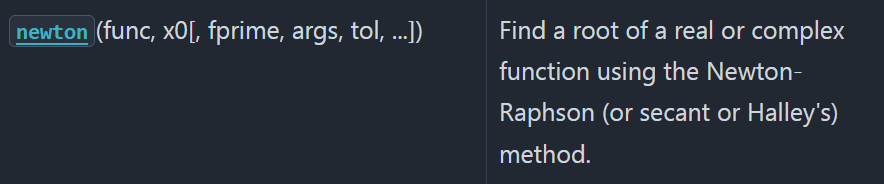

In [155]:
root = opt.newton(eq, 1.0, full_output=True )

print(f'The Root: {root[0]:.5f}')
print(f'\nInformation about the Root: \n{root}')

The Root: 1.90223

Information about the Root: 
(np.float64(1.902228949981325),       converged: True
           flag: converged
 function_calls: 12
     iterations: 11
           root: 1.902228949981325
         method: secant)
